In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders
from sklearn.preprocessing import OrdinalEncoder
import missingno
from sklearn.metrics import mean_absolute_error

In [3]:
# CARGAMOS EL ARCHIVO CSV Y LO LEEMOS
file_path_dataset = "https://raw.githubusercontent.com/jotapellop/MODELOS_TFM/main/df_central_2_1.csv"

df_central = pd.read_csv(file_path_dataset, delimiter=',') 

df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [ ]:
df_central.info()

In [6]:
# ELIMINAMOS COLUMNAS QUE NO APORTAN VALOR Y ALGUNAS QUE NO PODREMOS TENER PARA LA PREVISION
df_central.drop(['Unnamed: 0', 'DESVIO', 'f_PREV_HIGH', 'f_PREV_LOW', 'f_RUN'], axis=1, inplace=True)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,4,False,2021,1,1


In [17]:
df_central.describe()

,Fecha,Period,PREVISION,E_SIMEL,Dia_Semana,Año,Mes,Día
count,25066,25066.000000,25066.000000,25066.000000,25066.000000,25066.000000,25066.000000,25066.000000
mean,2022-06-08 23:26:13.222692096,12.500319,11.204947,9.634421,3.003072,2021.955478,6.308027,15.594710
min,2021-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000
25%,2021-09-20 00:00:00,7.000000,0.000000,0.000000,1.000000,2021.000000,3.000000,8.000000
50%,2022-06-09 00:00:00,13.000000,0.000000,0.000000,3.000000,2022.000000,6.000000,15.000000
75%,2023-02-26 00:00:00,18.000000,20.000000,13.984000,5.000000,2023.000000,9.000000,23.000000
max,2023-11-15 00:00:00,25.000000,49.000000,48.400000,6.000000,2023.000000,12.000000,31.000000
std,NaN,6.921158,17.959982,16.628467,2.003336,0.806524,3.344760,8.784945


In [7]:
# CONVERTIMOS LA COLUMNA'Fecha' A DATETIME Y VEMOS EL TIPO DE DATOS QUE NOS QUEDA AL DATAFRAME

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

df_central.dtypes


Fecha            datetime64[ns]
Period                    int64
PREVISION               float64
E_SIMEL                 float64
Dia_Semana                int64
Es_fin_semana              bool
Año                       int64
Mes                       int64
Día                       int64
dtype: object

In [8]:
# CALCULAMOS LA MATRIZ DE CORRELACION PARA VER LA RELACION ENTRE LAS VARIABLES

correlation_matrix = df_central.corr()

correlation_matrix


,Fecha,Period,PREVISION,E_SIMEL,Dia_Semana,Es_fin_semana,Año,Mes,Día
Fecha,1.000000,0.000320,0.023256,0.018925,-0.001782,-0.001856,0.942049,0.253417,0.010232
Period,0.000320,1.000000,0.290188,0.253824,0.000030,0.000009,0.000203,0.000350,0.000162
PREVISION,0.023256,0.290188,1.000000,0.888352,0.003017,-0.000007,0.020157,0.013305,-0.009405
E_SIMEL,0.018925,0.253824,0.888352,1.000000,-0.000052,-0.003424,0.014142,0.016508,0.003546
Dia_Semana,-0.001782,0.000030,0.003017,-0.000052,1.000000,0.791250,-0.000533,-0.003880,0.000669
Es_fin_semana,-0.001856,0.000009,-0.000007,-0.003424,0.791250,1.000000,0.000936,-0.008562,0.003363
Año,0.942049,0.000203,0.020157,0.014142,-0.000533,0.000936,1.000000,-0.084510,-0.018032
Mes,0.253417,0.000350,0.013305,0.016508,-0.003880,-0.008562,-0.084510,1.000000,-0.003364
Día,0.010232,0.000162,-0.009405,0.003546,0.000669,0.003363,-0.018032,-0.003364,1.000000


In [ ]:
"""
Podemos ver que las variables con más peso respecto a la variable objetivo 'E_SIMEL' son las variables 'PREVISION' y 'PERIOD'.
Por lo tanto vamos a ejecutar un modelo de Regresion Lineal para ver como predice el modelo con estas variables
"""

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# SELECCIONAMOS LAS VARIABLES DEPENDIENTES Y LA VARIABLE OBJETIVO

X = df_central[['PREVISION', 'Period']]
y = df_central['E_SIMEL']

# DIVIDIMOS LOS DATOS ENTRE ENTRENAMIENTO (80%) Y PRUEBA (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CREAMOS EL MODELO DE REGRESION LINEAL
model = LinearRegression()

# ENTRENAMOS EL MODELO CON LOS DATOS DE ENTRENAMIENTO
model.fit(X_train, y_train)

# REALIZAMOS LAS PREDICCIONES CON EL CONJUNTO DE PRUEBA
y_pred = model.predict(X_test)

# PARA TENER UNA IDEA DEL RESULTADO DE LA PREDICCION, CALCULAMOS EL ERROR CUADRATIVO MEDIO (MSE)
# Y EL COEFICIENTE DE DETERMINACION (R^2)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)

"""
A priori podemos ver que los resultados son relativamente buenos. La desviacion de los erros cuadráticos no son demasiado elevados dados los 
datos que estamos manejando en un margen del mínimo al máximo de 48 puntos y el coeficiente de determinacion a 0.808 cercano a 1 nos explica
el 81% por ciento de la variabilidad de la variable E_SIMEL
"""

(52.526587774072034, 0.807557714039014)

In [10]:
"""
Vamos a explorar un poco más los datos haciendo una validación cruzada de 5 folds y obtendremos el coeficiente de determinación
y la desvición estándard

"""


from sklearn.model_selection import cross_val_score

# VALIDACION CRUZADA DE 5 FOLDS
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# CALCULO DEL PROMEDIO Y LA DESVIACIÓN ESTÁNDARD
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

(cv_mean, cv_std)

"""
Los resultados continúan ser relativamente buenos. El coeficiente es cercano al del modelo de Regresion y la desviación estándard, con valores bajos,
nos indican que los resultados son más consistentes
"""


(0.7916015032977697, 0.08431055416891488)

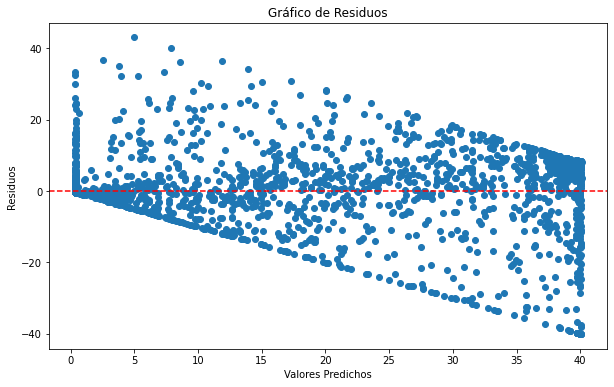

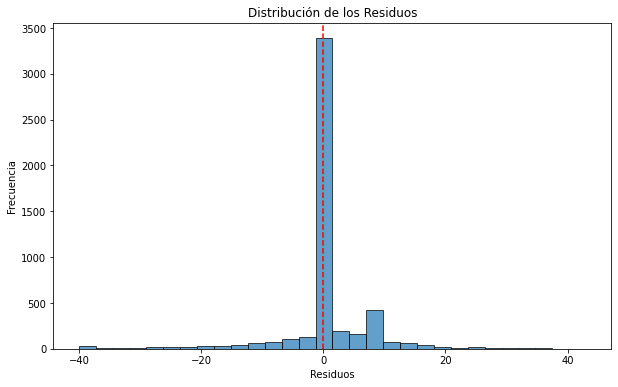

(0.16263558786842394, 7.245697857324078)

In [11]:
# VAMOS A VISUALIZAR LOS RESIDUOS

import matplotlib.pyplot as plt
import numpy as np

# CALCULO DE LOS RESIDUOS

residuos = y_test - y_pred

# VISUALIZAMOS LOS RESIDUOS

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# VISUALIZAMOS LA DISTRIBUCION DE LOS RESIDUOS

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()

# MEDIA I DESVIACION ESTANDARD DE LOS RESIDUOS

mean_residuos = np.mean(residuos)
std_residuos = np.std(residuos)

(mean_residuos, std_residuos)


In [ ]:
"""
Vemos muy significativo la gran cantidad de residuos en 0 y esto es debido a la naturaleza de los datos,
ya que la mayor parte de las horas del día tenemos una producción de energía en 0 y tmabién previsiones 0,
lo que nos da a entender de que puede haber un sesgo a la hora de la predicción del modelo
"""

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# VAMOS A REALIZAR UN ANÁLISI MÁS DETALLADO FILTRANDO SUBCONJUNOS EN QUE PREVISION NO SEA CERO PARA PODER VER
# HASTA DONDE LLEGA EL POSIBLE SESGO DE LA CANTIDAD IMPORTANTE DE CEROS.

X_test_filtered = X_test[(X_test['PREVISION'] > 0)]
y_test_filtered = y_test[X_test_filtered.index]

# REALIZAMOS LAS PREDICIONES EN EL SUBCONJUNTO FILTRADO CON EL MODELO ENTRENADO
y_pred_filtered = model.predict(X_test_filtered)

# Y EVALUAMOS EL RESULTADO DE LAS PREDICCIONES
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

(cv_scores.mean(), cv_scores.std(), mse_filtered, r2_filtered)

"""
El resultado nos confirma el sesgo en las predicciones del modelo en el conjunto entero de datos: el valor del MSE
ha subido considerablemente dando a entender la subida del error en la predicción, y el coeficiente de determinción ya 
está en torno al 50% lo que nos indica que el modelo tiene una capacidad predictiva moderada.
"""


(0.791601503297773, 0.0843105541689115, 145.02210942579887, 0.5466624614330693)

In [ ]:
"""
A partir de estos resultados decidimos explorar otros modelos 
"""